In [11]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [30]:
class PositiveNegativeCorrelation(object):
    def __init__(self, x, y, J):
        self._x = x
        self._y = y
        self._J = J
        self._x_mean = np.mean(x)
        self._y_mean = np.mean(y)
        self._H_pos = None
        self._H_neg = None

    @property
    def H_pos(self):
        if self._H_pos is None:
            # print("Computing H positive...")
            self._H_pos = self._compute_H_pos()
            # print("H positive value: " + str(self._H_pos))
        return self._H_pos

    @property
    def H_neg(self):
        if self._H_neg is None:
            # print("Computing H negative...")
            self._H_neg = self._compute_H_neg()
            # print("H negative value: " + str(self._H_neg))
        return self._H_neg

    def _compute_H_pos(self):
        H_pos = 0
        for j in range(self._J):
            aux = (((self._x[j] - self._x_mean) -
                    (self._y[j] - self._y_mean))/2.0)**2
            H_pos += aux
        H_pos = 1 - (H_pos*1.0/math.fabs(self._J))
        return H_pos

    def _compute_H_neg(self):
        H_neg = 0
        for j in range(self._J):
            aux = (((self._x[j] - self._x_mean) +
                    (self._y[j] - self._y_mean))/2.0)**2
            H_neg += aux
        H_neg *= 1.0/math.fabs(self._J)
        H_neg = 1 - H_neg
        return H_neg

In [31]:
class PairBasedCoherence(object):
    def __init__(self, X):
        self._X = np.array(X)
        self._I, self._J = X.shape
        self._HP = None

    @property
    def HP(self):
        if self._HP is None:
            # print("Calculating Pair based coherence..")
            self._HP = self._compute_HP_()
            # print("Paired based coherence value: " + str(self._HP))
        return self._HP

    def _compute_HP_(self):
        HP = 0
        for i in range(self._I):
            for j in range(i+1, self._I):
                if (i==j): 
                    break
                x = self._X[i]
                y = self._X[j]
                correlation = PositiveNegativeCorrelation(x, y,self._J)
                H0 = correlation.H_pos
                # H0 = max(correlation.H_pos,correlation.H_neg)
                HP += H0
        HP *= math.fabs(2.0)/(math.fabs(self._I)*(math.fabs(self._I)-1)) # if self._I > 1 else 0
        
        return HP

In [32]:
data = pd.read_csv('TestData/SimulatedDataCoherence/HighCoherenceMix.csv',header=None)
data.head()

,0,1,2,3,4,5,6
0,0.015521,0.013931,0.49935,0.98560,0.49268,0.006029,0.010850
1,0.007642,0.007915,0.49475,0.98089,0.49296,0.008737,0.007426
2,0.009314,0.000106,0.50717,0.98620,0.49783,0.007664,0.016632
3,0.003243,0.006791,0.50297,0.98170,0.50450,0.004663,0.018980
4,0.010901,0.011237,0.49306,0.98213,0.50162,0.017864,0.001509


In [33]:
coherence = PairBasedCoherence(data)

In [34]:
print(coherence.HP)

0.935941832453


Text(0.5,1.05,'Original dataset')

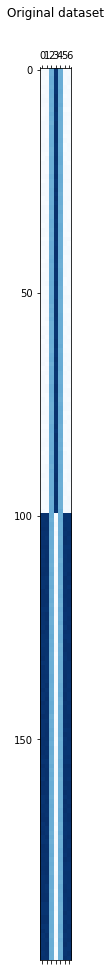

In [18]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [21]:
corr = PositiveNegativeCorrelation(np.array(data)[99],np.array(data)[100],data.shape[1])

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


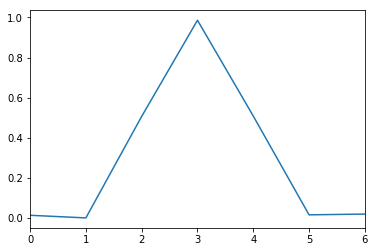

In [27]:
sns.tsplot(np.array(data)[99])

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


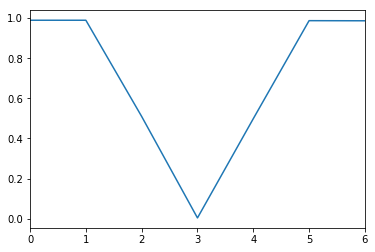

In [28]:
sns.tsplot(np.array(data)[100])

In [35]:
corr.H_pos

0.8727628204231338